## Project 1: Transaction Success Prediction

By: Robert S. Balch II

## Problem Definition: #1

This project is related to a binary classification problem using user historical data to predict whether or not a customer will make a transaction in the future based on their past transaction data.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv


## Data Collection/Imports

### #2 Load Imports

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

### #3 Load train.csv

In [ ]:
base_path = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv"
train_path = base_path + 'Transaction.train.csv'
test_path = base_path + 'Testing.test.csv'

In [ ]:
train_path

## Data Cleaning

### #4 Examine Data

In [ ]:
trans_data = pd.read_csv(base_path)

#### create default data frame

In [ ]:
trans_data_df = pd.DataFrame(trans_data)
trans_data_df

In [ ]:
trans_data_df.info()

### #5 Determine Data Cleaning

In [ ]:
trans_data_df.sample(n = 100)

## My Cleaning Recommendations
Unnamed: 0 and ID_code appear to have unusable data.
- Unnamed: 0 data is simply listing the position of the row which isnt helpful for our purposes
- ID_code is "object" data type

## Copy of trans_data_df
= trans_data_copy to trans_data_copy_2

In [ ]:
trans_data_copy = trans_data_df.copy()

#### drop columns that seem to have un-corroborative data

In [ ]:
trans_data_drop1 = trans_data_copy.drop("Unnamed: 0", axis=1)

In [ ]:
trans_data_drop2 = trans_data_drop1.drop("ID_code", axis=1)

In [ ]:
trans_data_copy_2 = trans_data_drop2.copy()

#### check for null values

In [ ]:
trans_data_copy_2.isnull().sum()

#### Mean, Median, Mode

In [ ]:
trans_data_copy_2.describe()

## Data Exploration

 #6 In the following cells I have visualized the cleaned dataframe across each column on.
 #7 I verified that the target column had no null values.
 #8

### #6 Visual Analysis of data

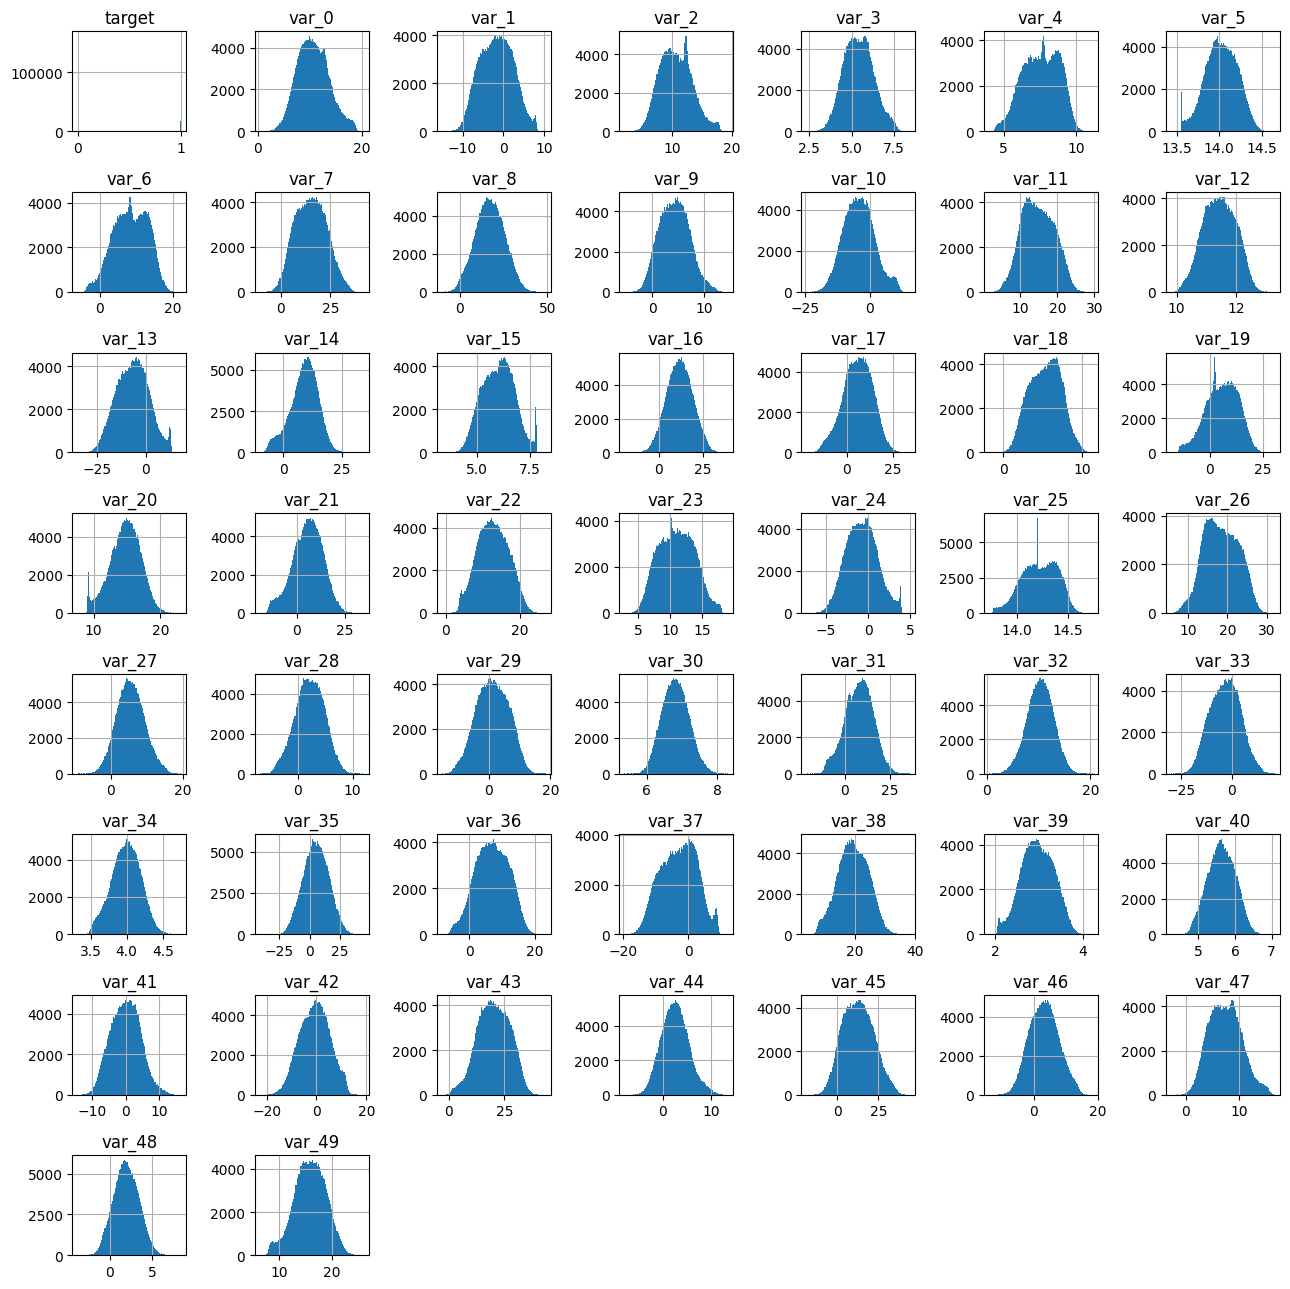

In [72]:
trans_data_copy_2.hist(figsize=(13, 13), bins=100)
plt.tight_layout()
plt.show()

### #7 Verify 'target' column

In [73]:
trans_data_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   target  180000 non-null  int64  
 1   var_0   180000 non-null  float64
 2   var_1   180000 non-null  float64
 3   var_2   180000 non-null  float64
 4   var_3   180000 non-null  float64
 5   var_4   180000 non-null  float64
 6   var_5   180000 non-null  float64
 7   var_6   180000 non-null  float64
 8   var_7   180000 non-null  float64
 9   var_8   180000 non-null  float64
 10  var_9   180000 non-null  float64
 11  var_10  180000 non-null  float64
 12  var_11  180000 non-null  float64
 13  var_12  180000 non-null  float64
 14  var_13  180000 non-null  float64
 15  var_14  180000 non-null  float64
 16  var_15  180000 non-null  float64
 17  var_16  180000 non-null  float64
 18  var_17  180000 non-null  float64
 19  var_18  180000 non-null  float64
 20  var_19  180000 non-null  float64
 21  var_20  18

## #8 Check Correlations between predictors

### View correlation graphs and data

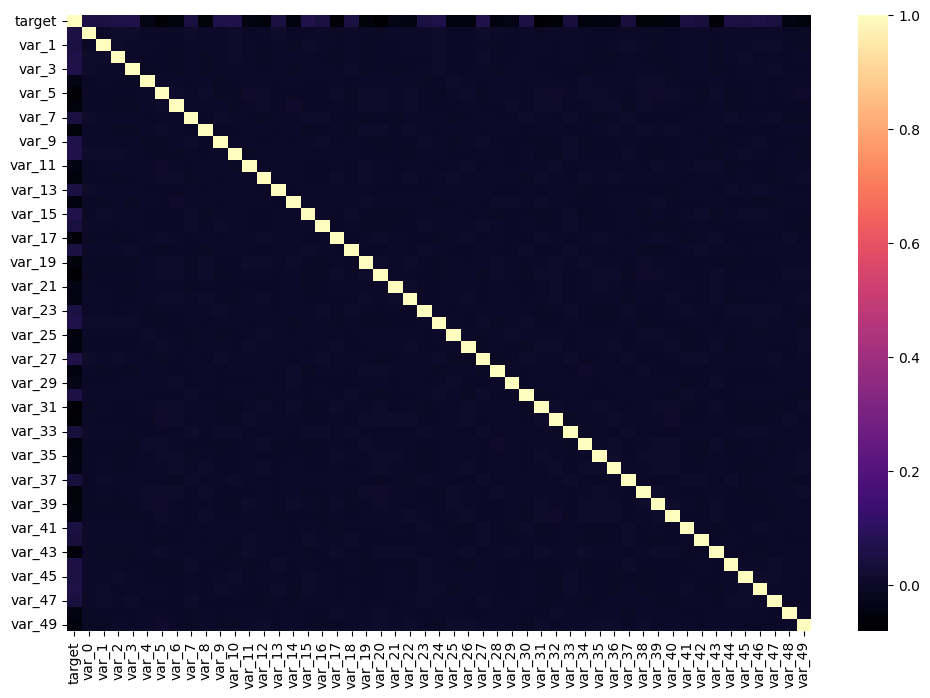

In [74]:
# Here we show a heatmap of the correlations in this remaining data

# corr calculates the correlation matrix for the dataset in trans_data_copy_2
corr = trans_data_copy_2.corr()
# here the heatmap is generated and sized
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='magma',annot = False);

In [75]:
# Here we removes the perfect correlations so we can foCus on the relationships between different unique variables
corr_unstacked = corr.unstack()
corr_unstacked

target  target    1.000000
        var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
                    ...   
var_49  var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
        var_49    1.000000
Length: 2601, dtype: float64

In [76]:
# Here we select correlations with the 'target' variable and take the absolute values of these correlations
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

In [77]:
corr_unstacked_not_self['target'].abs().sort_values(ascending = False)

,0
var_20,0.080689
var_31,0.073296
var_5,0.070015
var_3,0.066924
var_27,0.064868
var_32,0.063871
var_10,0.063565
var_15,0.062887
var_43,0.061291
var_17,0.059906


In [78]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

var_20  target    0.080689
target  var_20    0.080689
        var_31    0.073296
var_31  target    0.073296
var_5   target    0.070015
                    ...   
var_18  var_43    0.000019
var_41  var_39    0.000018
var_39  var_41    0.000018
var_45  var_48    0.000009
var_48  var_45    0.000009
Length: 2550, dtype: float64

### Correlation Analysis

The correlations suggest that specific sale var_* have a higher (albeit small) chance of being involved in a successful sale.

In [79]:
corr_pair[::2].head(20)

var_20  target    0.080689
target  var_31    0.073296
var_5   target    0.070015
var_3   target    0.066924
target  var_27    0.064868
var_32  target    0.063871
target  var_10    0.063565
        var_15    0.062887
var_43  target    0.061291
target  var_17    0.059906
var_24  target    0.059306
target  var_9     0.059227
        var_8     0.057378
        var_39    0.057373
        var_19    0.057320
var_46  target    0.056902
var_38  target    0.055704
target  var_2     0.055450
        var_6     0.054375
var_34  target    0.053733
dtype: float64

## Data Processing

### #9 Create sale and no_sale Dataframes

In [80]:
df_target_0 = trans_data_copy_2[trans_data_copy_2['target'] == 0]

In [81]:
df_target_0.shape

(161960, 51)

In [82]:
df_target_1 = trans_data_copy_2[trans_data_copy_2['target'] == 1]

In [83]:
df_target_1.shape

(18040, 51)

In [84]:
sale = pd.DataFrame(df_target_1).copy()

In [85]:
no_sale = pd.DataFrame(df_target_0).copy()

### #10 predictor and target Dataframes

In [86]:
drop_target = trans_data_copy_2.copy()

In [87]:
dropped_target = drop_target.drop("target", axis=1)

In [88]:
predictors = dropped_target.copy()

In [89]:
drop_var = trans_data_copy_2.copy()

In [90]:
columns_to_drop = [col for col in drop_var.columns if col != 'target']

In [91]:
dropped_var = drop_var.drop(columns=columns_to_drop)

In [92]:
target = dropped_var
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
179995,0
179996,0
179997,0
179998,0


### #11 initialize GaussianNB()

In [93]:
gnb = GaussianNB()

### create train_test_split

### #12 Divide Data Frames
### #13 Train Model on testing subset
### #14 Train Model on training subset
### #15 cross-validation loop to calculate model accuracy

In [94]:
X = predictors
y = target['target']

In [95]:
numLoops = 50
accuracy_scores = np.zeros(numLoops)

for idx in range(numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy_scores[idx] = metrics.accuracy_score(y_test, y_pred)

mean_accuracy = accuracy_scores.mean()
print(f"Mean accuracy over {numLoops} iterations: {mean_accuracy:.4f}")


Mean accuracy over 50 iterations: 0.9110


In [96]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [97]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.91146


### #16 Histogram

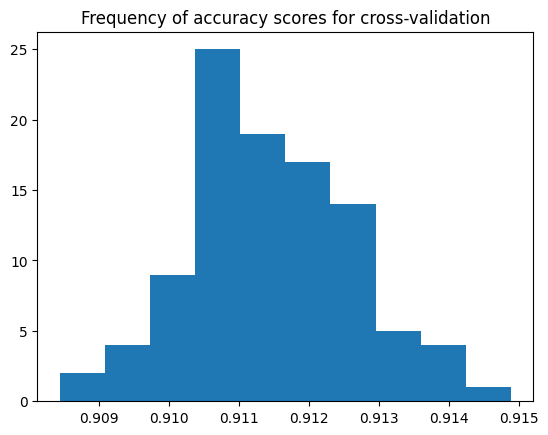

In [98]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

### #17 Confusion Matrix



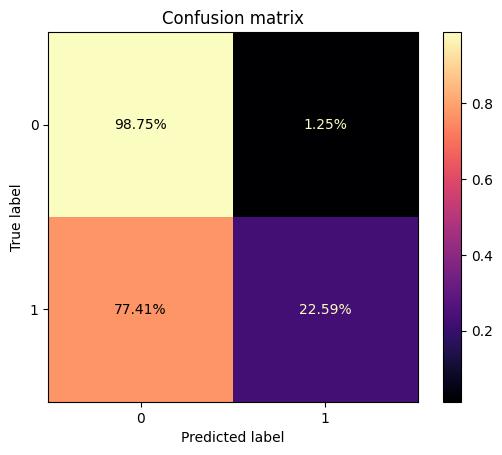

In [99]:
# The difference between our true results and trained model results shows that the data is extremely biased towards non transaction data. This means we should balance the data to ensure the model learns equally from both classes

metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'magma',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

### #18 Remove enough no_sale transaction rows to get a 50% split on the remaining data

In [100]:
# Calculate the number of successful transactions
num_successful = sale.shape[0]

# Calculate the number of unsuccessful transactions needed for a 50/50 split
num_unsuccessful_needed = num_successful


In [101]:
# Randomly sample the required number of unsuccessful transactions
balanced_unsuccessful = no_sale.sample(n=num_unsuccessful_needed, random_state=42)

# Combine the successful and balanced unsuccessful transactions
balanced_data = pd.concat([sale, balanced_unsuccessful])

In [102]:
# Shuffle the balanced data to mix successful and unsuccessful transactions
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [103]:
X = balanced_data.drop('target', axis=1)
y = balanced_data['target']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### #19 cross_validate this dataset with previous dataset

In [105]:
num_successful = sale.shape[0]
num_successful

18040

### #20 Compare the results of original model with balanced_data model

In [106]:
num_unsuccessful_needed = num_successful

In [107]:
balanced_unsuccessful = no_sale.sample(n=num_unsuccessful_needed, random_state=42)
balanced_unsuccessful

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
80859,0,12.1309,3.7023,10.6870,4.8607,8.3384,14.0598,10.4503,20.2311,14.3418,...,5.1105,7.3679,1.6603,14.3169,2.4792,12.6246,8.0895,9.0333,-0.8285,16.2125
109717,0,12.7841,1.6487,13.6093,5.4508,6.9768,14.0315,7.7062,15.2112,14.8516,...,6.1045,-3.8136,6.0848,17.3155,5.6732,9.5605,-1.9631,10.6872,3.3487,10.8504
101363,0,14.1356,-1.5536,8.8026,4.2596,6.0682,14.3595,6.4783,21.7879,11.2882,...,5.7449,1.3742,7.1982,22.9952,1.3705,-2.2522,9.1098,11.7496,0.9344,18.2137
31967,0,9.1378,4.3576,11.1524,5.6191,9.0943,14.1932,9.3744,20.7422,14.9814,...,6.0328,0.3656,0.3035,21.0027,0.2591,17.2723,-0.4296,3.1559,2.0230,19.8078
166320,0,8.6641,1.3106,8.7793,5.9572,8.8266,13.8616,7.9522,16.0807,32.0387,...,6.0227,-5.1135,-0.8195,18.0469,0.0150,31.3485,2.0435,5.2614,4.0196,18.4218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81163,0,12.1422,-2.8988,13.1033,5.3490,6.3190,14.0253,8.7461,6.9149,13.7323,...,5.4888,1.9239,-8.6241,31.4515,-0.1695,5.2332,2.8835,11.8437,2.8760,13.9019
32398,0,9.7524,3.8086,13.1269,4.6394,7.3419,13.8947,4.7452,2.4847,19.7541,...,5.5012,2.0163,-5.6715,13.7175,3.0626,8.2874,5.2872,10.1429,3.1365,9.3139
14450,0,9.9823,-0.4673,9.9985,5.7266,9.3172,13.8065,3.9257,3.6788,12.3129,...,6.4015,-5.7487,-11.0315,17.5494,0.2027,6.9605,11.4777,7.8525,-0.5350,17.5503
113417,0,11.3612,-5.9554,12.0801,5.2457,8.7765,13.8354,3.0177,6.8331,11.9661,...,5.2804,0.4139,-9.4331,26.0366,-1.7131,17.7673,-7.2745,4.2469,1.7355,15.0371


In [108]:
whole_data_accuracy = trans_data_copy_2

In [109]:
whole_mean_accuracy = round(accuracy_scores.mean(), 5)
balanced_mean_accuracy = round(balanced_data.mean(), 5)
whole_mean_accuracy


0.91146

In [110]:
balanced_data = pd.concat([sale, balanced_unsuccessful])
balanced_data

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,1,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,1,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,1,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,1,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,1,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81163,0,12.1422,-2.8988,13.1033,5.3490,6.3190,14.0253,8.7461,6.9149,13.7323,...,5.4888,1.9239,-8.6241,31.4515,-0.1695,5.2332,2.8835,11.8437,2.8760,13.9019
32398,0,9.7524,3.8086,13.1269,4.6394,7.3419,13.8947,4.7452,2.4847,19.7541,...,5.5012,2.0163,-5.6715,13.7175,3.0626,8.2874,5.2872,10.1429,3.1365,9.3139
14450,0,9.9823,-0.4673,9.9985,5.7266,9.3172,13.8065,3.9257,3.6788,12.3129,...,6.4015,-5.7487,-11.0315,17.5494,0.2027,6.9605,11.4777,7.8525,-0.5350,17.5503
113417,0,11.3612,-5.9554,12.0801,5.2457,8.7765,13.8354,3.0177,6.8331,11.9661,...,5.2804,0.4139,-9.4331,26.0366,-1.7131,17.7673,-7.2745,4.2469,1.7355,15.0371


In [111]:
X_balanced = balanced_data.drop('target', axis=1)
y_balanced = balanced_data['target']

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

balanced_data_accuracy = cross_validate(X_balanced, y_balanced, 100)
balanced_data_mean_accuracy = round(balanced_data_accuracy.mean(), 5)
print(f"Mean accuracy on balanced dataset: {balanced_data_mean_accuracy}")

Mean accuracy on balanced dataset: 0.758


In [112]:
X_whole = predictors
y_whole = target['target']

whole_data_accuracy = cross_validate(X_whole, y_whole, 100)
whole_data_mean_accuracy = round(whole_data_accuracy.mean(), 5)
print(f"Mean accuracy on whole dataset: {whole_data_mean_accuracy}")

Mean accuracy on whole dataset: 0.91129


### #21 Data Visualization

### Confusion Matrix and results of classification report

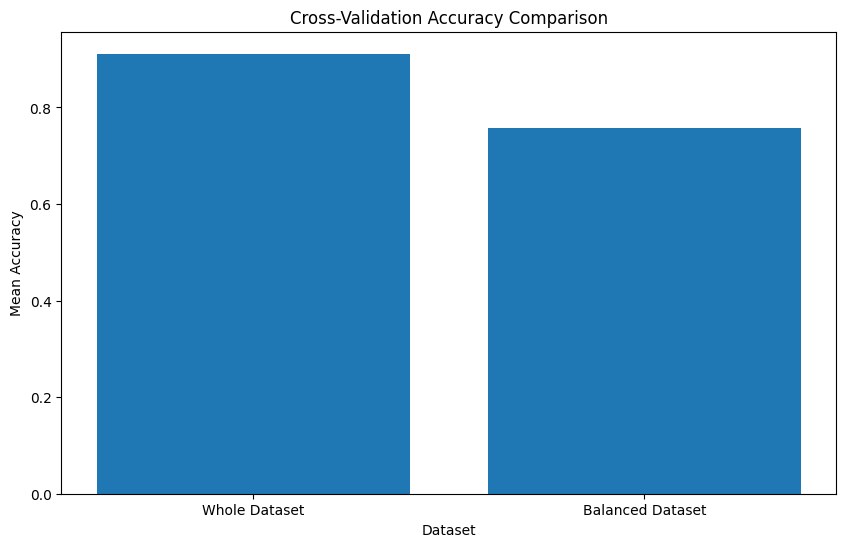

In [113]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(['Whole Dataset', 'Balanced Dataset'], [whole_data_mean_accuracy, balanced_data_mean_accuracy])
plt.xlabel('Dataset')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Accuracy Comparison')
plt.show()

## Final thoughts/ Communicate Results

### Data Cleaning and Exploration:
The initial dataset contains 53 columns. Upon examination, the 'Unnamed: 0' and 'ID_code' columns appear irrelevant and are removed. The remaining data is checked for null values, and descriptive statistics are calculated. Histograms are generated for visual analysis of the data distribution. The 'target' column, representing transaction success (1) or failure (0), is verified.

###Correlation Analysis:
A correlation matrix is created to identify relationships between predictors. The analysis focuses on correlations with the 'target' variable, revealing the predictors with the prediction

### Model Training and Evaluation (Initial):
A Gaussian Naive Bayes (GNB) model is initialized. The data is split into training and testing sets. The model is trained and evaluated using a loop with 50 iterations, achieving a mean accuracy of 91.11%. Cross-validation is performed with 100 iterations, resulting in a mean accuracy of 75.857%.

### Addressing Class Imbalance:
The analysis recognizes a class imbalance in the dataset. To address this, a balanced dataset is created by randomly sampling an equal number of successful and unsuccessful transactions.

### Model Training and Evaluation (Balanced Data):
The GNB model is trained and evaluated on the balanced dataset. The mean accuracy on the balanced dataset is 75.8%, compared to 91.111% on the original dataset. This difference highlights the impact of class imbalance on model performance.

### Results and Comparison:
A bar chart visualizes the mean accuracy scores for both the original and balanced datasets. The confusion matrix and a classification report are generated to further evaluate the model's performance.

# Hypothesis:

The data suggests that the median chance of a customer making a purchase in the future is approximately 1/100.  However the Initial data is heavily biased towards unsuccessful transactions. By balancing our training data we see a higher probability around 25% chance of successful transactions.

Upon closer inspection, we observe slightly higher correlations between certain var_* variables and successful transactions

Specifically:

The three highest correlated variables (var_20, var_31, and var_5) show correlation coefficients ranging from 0.080689 to 0.070015. While these correlations are not extremely strong, they do indicate a positive relationship between these variables and successful transactions.

Variables with correlation coefficients greater than 0.05 suggest a higher chance of a successful transaction. This threshold, while not definitive, provides a baseline for identifying potentially influential factors.

The correlation analysis reveals a pattern where certain variables are more strongly associated with successful purchases than others. This suggests that focusing on these variables could potentially improve predictive models and marketing strategies.

It's important to note that correlation does not imply causation and to keep in mind that the original dataset is highly imbalanced.

These relationships may indicate underlying factors that contribute to successful transactions, but further analysis would be needed to determine causal relationships.

The relatively low correlation coefficients across all variables suggest that successful transactions are likely influenced by a complex interplay of factors, rather than being strongly determined by any single variable.

This analysis provides valuable insights into the relationships between various factors and successful transactions, allowing for more informed decision-making in product development, marketing strategies, and customer targeting. However, it's crucial to interpret these findings in the context of broader market research and business knowledge to derive actionable insights.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


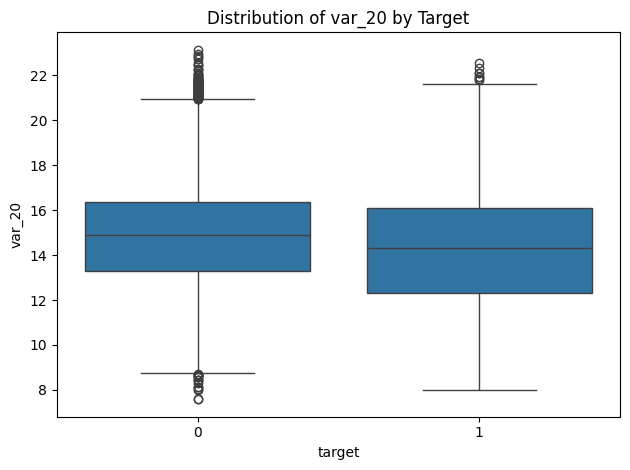

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


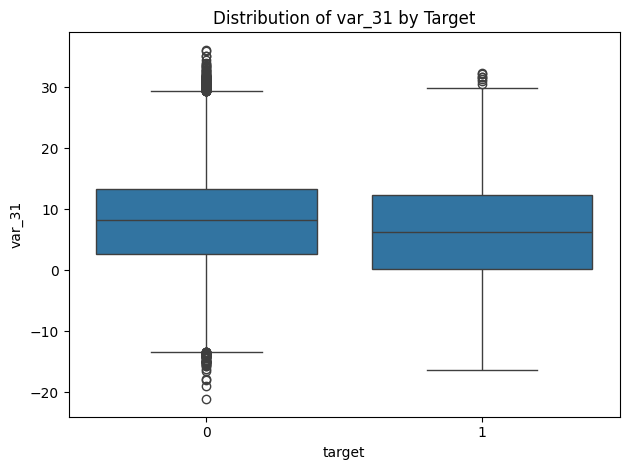

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


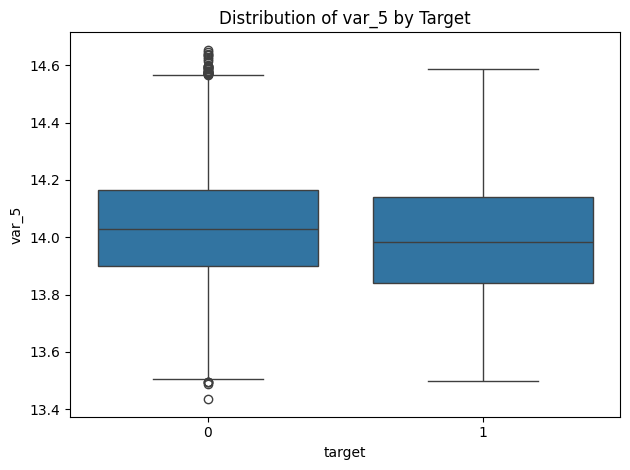

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in ['var_20', 'var_31', 'var_5']:
    sns.boxplot(x='target', y=var, data=trans_data_copy_2)
    plt.title(f'Distribution of {var} by Target')
    plt.tight_layout()
    plt.show()

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False).head(10))


Object `mitigated` not found.


NameError: name 'feature_importances' is not defined

In [ ]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Retrain the model on the balanced dataset
gnb_balanced = GaussianNB()
gnb_balanced.fit(X_train_balanced, y_train_balanced)

# Create the confusion matrix
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_balanced,
    X_test_balanced,
    y_test_balanced,
    normalize='true',
    values_format='.2%',
    cmap='magma',
)
plt.title('Confusion Matrix - Balanced Dataset')
plt.show()

# Citations
[Titanic Survival Project:](https://nbviewer.org/urls/ddc-datascience.s3.us-west-1.amazonaws.com/Projects/Example/Titanic.Survival.Prediction.Using.Naive.Bayes.ipynb)
/
[Kyla Bendt:](https://github.com/KylaBendt)
